Importing Datasets from kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d chetankv/dogs-cats-images

 97% 420M/435M [00:02<00:00, 160MB/s]
100% 435M/435M [00:02<00:00, 171MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-cats-images.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D, Flatten, BatchNormalization, Dropout

In [6]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory = "/content/dataset/training_set",
    labels = "inferred",
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    directory = "/content/dataset/test_set",
    labels = "inferred",
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [7]:
def Normalize_0_1(image,label):
    image = tf.cast(image/255.,tf.float32)
    return image,label

train_dataset = train_dataset.map(Normalize_0_1)
validation_dataset = validation_dataset.map(Normalize_0_1)

In [8]:
model = Sequential([
    Conv2D(32,kernel_size = (3,3),padding = "valid",activation = "relu", input_shape =(256,256,3)),
    MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid"),

    Conv2D(64,kernel_size = (3,3),padding = "valid",activation = "relu"),
    MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid"),

    Conv2D(128,kernel_size = (3,3),padding = "valid",activation = "relu"),
    MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid"),
    Flatten(),

    Dense(128,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(1,activation = "sigmoid"),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [10]:
model.compile(optimizer= "adam",loss="binary_crossentropy",metrics=['accuracy'])

In [11]:
history = model.fit(train_dataset,epochs=10,validation_data=validation_dataset)

Epoch 1/10
250/250 [==============================] - 1149s 5s/step - loss: 0.6891 - accuracy: 0.5406 - val_loss: 0.6256 - val_accuracy: 0.6400
Epoch 2/10
250/250 [==============================] - 1126s 5s/step - loss: 0.6241 - accuracy: 0.6525 - val_loss: 0.5929 - val_accuracy: 0.6770
Epoch 3/10
250/250 [==============================] - 1087s 4s/step - loss: 0.5799 - accuracy: 0.6914 - val_loss: 0.5750 - val_accuracy: 0.7070
Epoch 4/10
250/250 [==============================] - 1080s 4s/step - loss: 0.4916 - accuracy: 0.7550 - val_loss: 0.6282 - val_accuracy: 0.7190
Epoch 5/10
250/250 [==============================] - 1086s 4s/step - loss: 0.3974 - accuracy: 0.8117 - val_loss: 0.6195 - val_accuracy: 0.7405
Epoch 6/10
250/250 [==============================] - 1086s 4s/step - loss: 0.2631 - accuracy: 0.8879 - val_loss: 0.8491 - val_accuracy: 0.7365
Epoch 7/10
250/250 [==============================] - 1134s 5s/step - loss: 0.1557 - accuracy: 0.9379 - val_loss: 1.0320 - val_accuracy:

In [13]:
import pickle

filename = 'cats_vs_dogs_trained_model'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

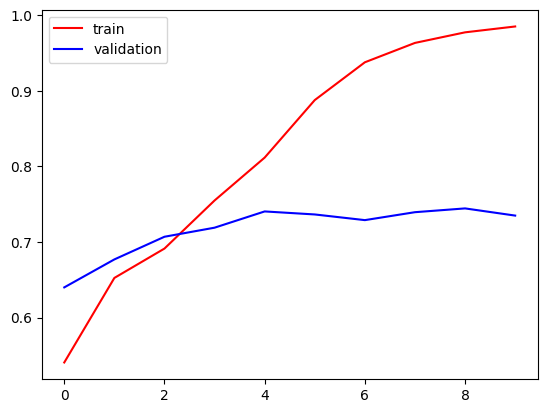

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color = 'blue',label='validation')
plt.legend()
plt.show()

Using Batch normalization and dropout

In [19]:
model1 = Sequential([
    Conv2D(32,kernel_size = (3,3),padding = "valid",activation = "relu", input_shape =(256,256,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid"),

    Conv2D(64,kernel_size = (3,3),padding = "valid",activation = "relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid"),

    Conv2D(128,kernel_size = (3,3),padding = "valid",activation = "relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid"),
    Flatten(),

    Dense(128,activation = "relu"),
    Dropout(0.1),
    Dense(64,activation = "relu"),
    Dropout(0.1),
    Dense(1,activation = "sigmoid"),
])

In [20]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model1.compile(optimizer= "adam",loss="binary_crossentropy",metrics=['accuracy'])
history1 = model1.fit(train_dataset,epochs=10,validation_data=validation_dataset)

Epoch 1/10
250/250 [==============================] - 1480s 6s/step - loss: 2.1811 - accuracy: 0.5566 - val_loss: 1.2080 - val_accuracy: 0.4930
Epoch 2/10
250/250 [==============================] - 1551s 6s/step - loss: 0.7672 - accuracy: 0.5970 - val_loss: 0.6481 - val_accuracy: 0.6040
Epoch 3/10
250/250 [==============================] - 1512s 6s/step - loss: 0.6187 - accuracy: 0.6640 - val_loss: 0.6778 - val_accuracy: 0.5570
Epoch 4/10
250/250 [==============================] - 1511s 6s/step - loss: 0.5546 - accuracy: 0.7188 - val_loss: 0.5553 - val_accuracy: 0.7175
Epoch 5/10
250/250 [==============================] - 1450s 6s/step - loss: 0.5092 - accuracy: 0.7499 - val_loss: 0.6659 - val_accuracy: 0.6860
Epoch 6/10
250/250 [==============================] - 1487s 6s/step - loss: 0.4524 - accuracy: 0.7897 - val_loss: 0.5110 - val_accuracy: 0.7605
Epoch 7/10
250/250 [==============================] - 1486s 6s/step - loss: 0.3816 - accuracy: 0.8274 - val_loss: 0.7508 - val_accuracy:

In [ ]:
filename = 'cats_vs_dogs_improved_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model1, file)

In [ ]:
plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color = 'blue',label='validation')
plt.legend()
plt.show()